In [1]:
import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from data_utils import *

In [2]:
data_dir = "..\data"
subject_id = 1
trial_name = "walking_baseline1"

data_tag = "forces.mot"

grf_file = 'walking_baseline1_forces.mot'
grf_file_path = f"{data_dir}\\Subject{subject_id}\\ExpmtlData\\GRF\\{trial_name}_{data_tag}"

grf_storage = osim.Storage(grf_file_path)

In [3]:
time_grf_col = osim.ArrayDouble()
grf_x_r_col = osim.ArrayDouble()
grf_y_r_col = osim.ArrayDouble()
grf_z_r_col = osim.ArrayDouble()
grf_x_l_col = osim.ArrayDouble()
grf_y_l_col = osim.ArrayDouble()
grf_z_l_col = osim.ArrayDouble()

grf_storage.getTimeColumn(time_grf_col)
grf_storage.getDataColumn('ground_force_vx', grf_x_r_col)
grf_storage.getDataColumn('ground_force_vy', grf_y_r_col)
grf_storage.getDataColumn('ground_force_vz', grf_z_r_col)
grf_storage.getDataColumn('1_ground_force_vx', grf_x_l_col)
grf_storage.getDataColumn('1_ground_force_vy', grf_y_l_col)
grf_storage.getDataColumn('1_ground_force_vz', grf_z_l_col)

time_grf = ad2float(time_grf_col)
grf_x_r = ad2float(grf_x_r_col)
grf_y_r = ad2float(grf_y_r_col)
grf_z_r = ad2float(grf_z_r_col)
grf_x_l = ad2float(grf_x_l_col)
grf_y_l = ad2float(grf_y_l_col)
grf_z_l = ad2float(grf_z_l_col)

In [4]:
seg_end_pairs = np.where(np.diff(grf_y_r > 0) == 1)[0] + 1

# seg_end_pairs

num_segments = len(seg_end_pairs) // 2
print(f"Number of segments: {num_segments}")

Number of segments: 54


In [8]:
grf_segments = []

for i in range(num_segments):
    start_idx = seg_end_pairs[2 * i]
    end_idx = seg_end_pairs[2 * i + 1]
    grf_segment = grf_y_r[start_idx:end_idx]
    grf_segments.append(grf_segment)

max_len = max([len(seg) for seg in grf_segments])
print(f"Max segment length: {max_len}")

Max segment length: 37


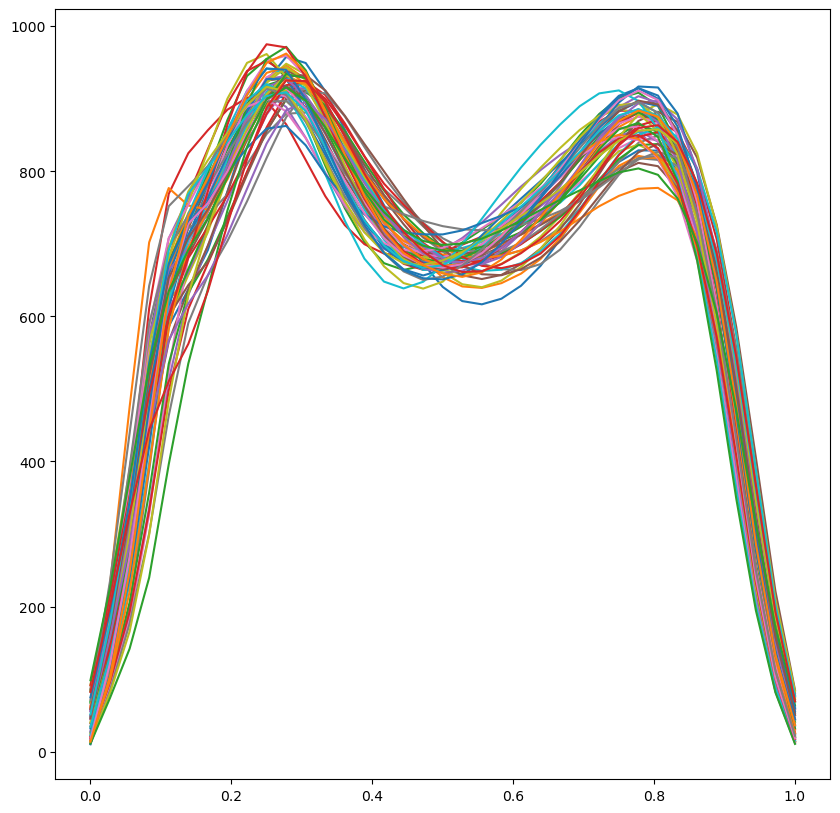

In [12]:
grf_segments_resampled = []

plt.figure(figsize=(10, 10))
for i in range(num_segments):
    original_time = np.linspace(0, 1, len(grf_segments[i]))
    
    resampled_time = np.linspace(0, 1, max_len)
    
    interp_seg = np.zeros(max_len)
    
    interp_func = interp1d(original_time, grf_segments[i], kind='linear')
    interp_seg[:] = interp_func(resampled_time)
    
    grf_segments_resampled.append(interp_seg)
    plt.plot(resampled_time, interp_seg)
    
plt.show()